In [1]:
import pandas as pd
train = pd.read_csv('titanic_train.csv', sep=',')
train.set_index("PassengerId", inplace=True, drop=True)
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [2]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

/tmp/ipykernel_27128/2602115736.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(train.corr(), cmap="PiYG", vmax=1.0, vmin=-1.0)


<AxesSubplot: >

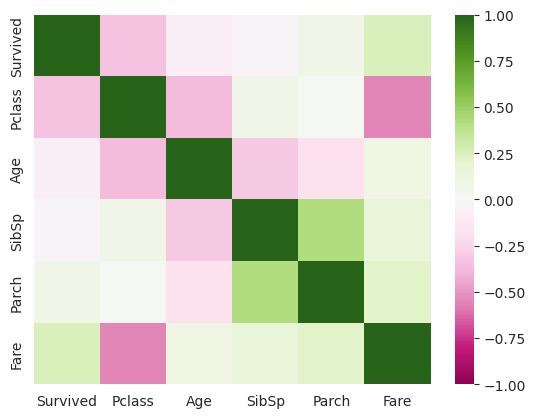

In [3]:
import seaborn as sn
sn.heatmap(train.corr(), cmap="PiYG", vmax=1.0, vmin=-1.0)

In [4]:
# Partie 2 -  Premier mod`ele de niveau 0

In [5]:
def parse_model_0(X):
    target = X.Survived
    X = X[["Fare", "SibSp", "Parch"]]
    return X, target
X, y = parse_model_0(train.copy())

In [6]:
import numpy as np
from sklearn.model_selection import cross_val_score

def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv = 5)
    return np.mean(xval)



In [7]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

lr = LogisticRegression()
lr.fit(X,y)

compute_score(lr, X, y)

0.6746092524009792

In [9]:
# Partie 3 - Deuxième modèle

In [10]:
survived = train.copy()[train.Survived == 1]
dead = train.copy()[train.Survived == 0]

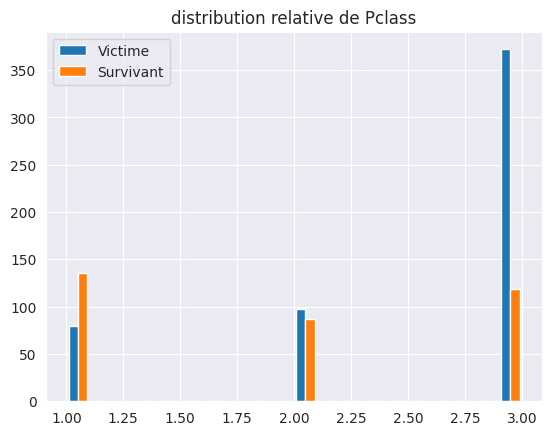

In [11]:
import matplotlib.pyplot as plt

def plot_hist(feature, bins = 20):
    x1 = dead[feature].dropna()
    x2 = survived[feature].dropna()
    plt.hist([x1, x2], label=["Victime", "Survivant"], bins = bins)  #, color = [’’, ’b’]
    plt.legend(loc = "upper left")
    plt.title("distribution relative de %s" % feature)
    plt.show()

plot_hist("Pclass")

In [12]:
def parse_model_1(X):
    target = X.Survived
    class_dummies = pd.get_dummies(X["Pclass"], prefix="split_Pclass")
    X = X.join(class_dummies)
    to_del = ["Name", "Age", "Cabin", "Embarked", "Survived", "Ticket", "Sex", "Pclass"]
    for col in to_del :
        del X[col]
    return X, target

X, y = parse_model_1(train.copy())

lr.fit(X,y)
compute_score(lr, X, y)

/home/ludwig/Documents/ULCO/M2/IA - Verel/TPS/Tp2/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6937040989266211

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


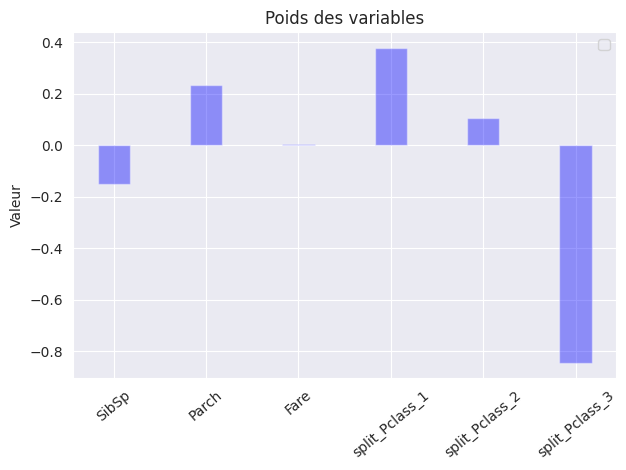

In [13]:
def plot_lr_coefs(X, lr):
    fig, ax = plt.subplots()
    xlabels = X.columns.values.tolist()
    yvalues = lr.coef_[0,]
    index = np.arange(len(yvalues))
    bar_width = 0.35
    opacity = 0.4
    rects = plt.bar(index, yvalues,
    bar_width, alpha=opacity,
    color="b", label ="")
    plt.ylabel("Valeur")
    plt.title("Poids des variables")
    plt.xticks(index, xlabels, rotation=40)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_lr_coefs(X, lr)

In [14]:
def parse_model_2(X):

    X.Age = X.Age.fillna(np.nanmedian( X["Age"]))

    target = X.Survived

    class_dummies = pd.get_dummies(X["Pclass"], prefix="split_Pclass")
    X = X.join(class_dummies)

    class_dummies = pd.get_dummies(X["Sex"], prefix="split_sex")
    X = X.join(class_dummies)

    to_del = ["Name", "Cabin", "Embarked", "Survived", "Ticket", "Sex", "Pclass"]
    for col in to_del :
        del X[col]
    return X, target

X, y = parse_model_2(train.copy())

lr = LogisticRegression()
lr.fit(X,y)

compute_score(lr, X, y)

/home/ludwig/Documents/ULCO/M2/IA - Verel/TPS/Tp2/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ludwig/Documents/ULCO/M2/IA - Verel/TPS/Tp2/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

0.7867553825874083

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


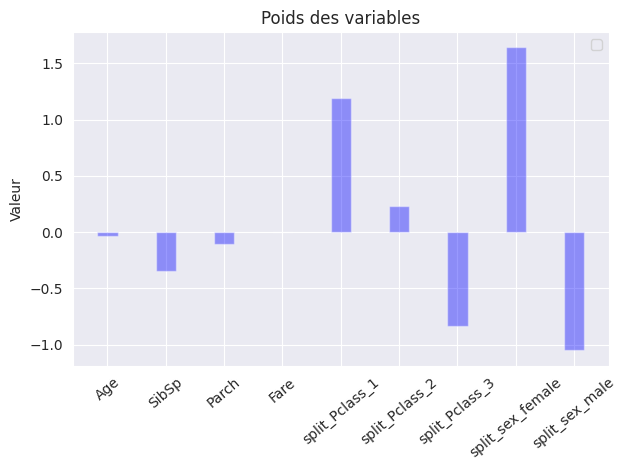

In [15]:
plot_lr_coefs(X, lr)

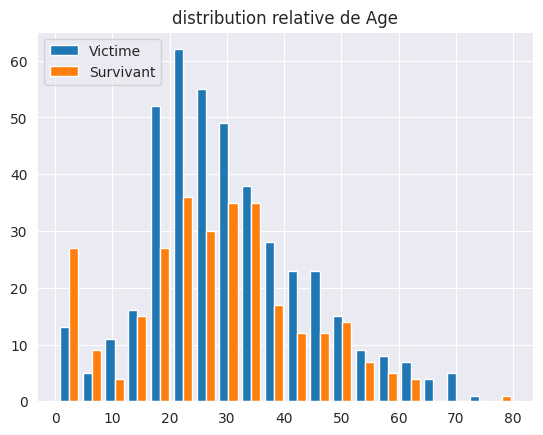

In [16]:
plot_hist("Age")

In [17]:
# Partie 4 - Troisiéme modéle

In [18]:
X["is_child"] = X.Age < 8

lr = LogisticRegression()
lr.fit(X,y)

compute_score(lr, X, y)


/home/ludwig/Documents/ULCO/M2/IA - Verel/TPS/Tp2/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ludwig/Documents/ULCO/M2/IA - Verel/TPS/Tp2/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

0.7968489109283786

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


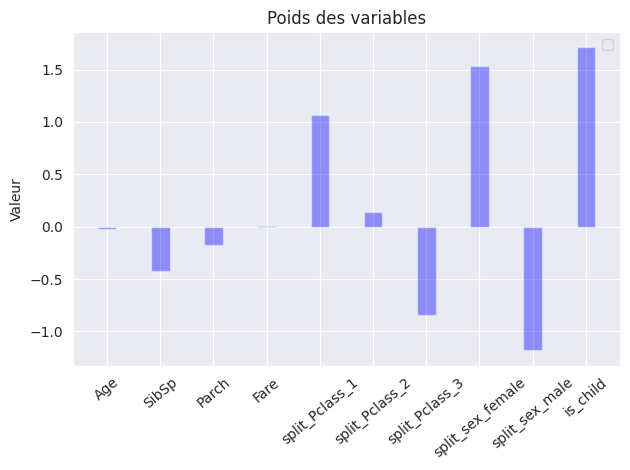

In [19]:
plot_lr_coefs(X, lr)